In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Load the dataset
df = pd.read_csv("creditdata.csv")
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())


In [8]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:

import warnings
warnings.filterwarnings('ignore')


In [11]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [13]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#  Feature Scaling

In [14]:
# KMeans is distance-based, so we scale all numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

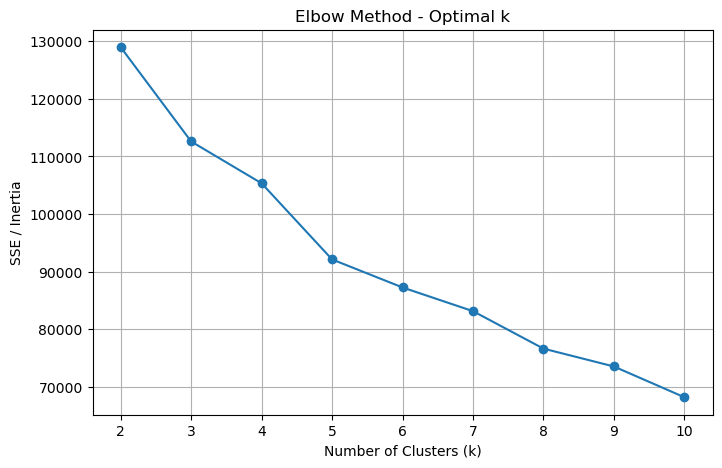

In [15]:
# 6. Elbow Method to Find Optimal k
sse = []  # Sum of Squared Errors
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE / Inertia')
plt.grid(True)
plt.show()


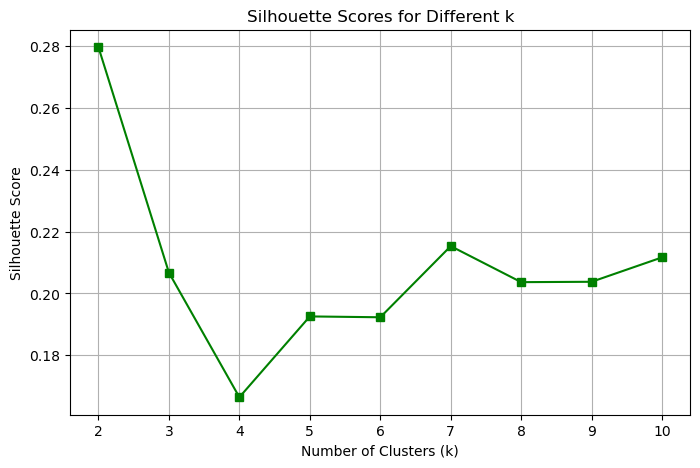

In [17]:
# 7. Silhouette Score to Support the Elbow Method
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [18]:
# 8. Apply K-Means with Optimal k 
#ASSUME K= 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# View cluster assignments
df['Cluster'].value_counts()


Cluster
3    3368
2    3118
1    1487
0     977
Name: count, dtype: int64

In [19]:
# 9. Analyze Cluster Characteristics
# Group by Cluster and view mean feature values
cluster_summary = df.groupby('Cluster').mean()
cluster_summary


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,5010.394668,0.966663,716.017789,450.235875,265.885977,5065.974690,0.327150,0.160632,0.218675,0.508502,15.770727,10.345957,8208.653578,4173.817878,2214.536286,0.040025,11.416581
1,108.430006,0.412096,350.247868,190.521089,160.197189,299.482324,0.320591,0.072760,0.234912,0.035072,0.730330,4.812374,3632.112008,1036.853064,172.183554,0.253704,11.217888
2,1253.817942,0.974758,2182.022178,1241.768493,940.517248,234.564524,0.928413,0.390217,0.748106,0.041717,0.807569,32.727389,5121.987288,2148.583305,778.937414,0.282970,11.729314
3,1495.324927,0.966467,283.482824,210.004454,73.794186,782.285268,0.207097,0.098032,0.108717,0.157514,2.988420,3.665380,3216.349960,947.961448,805.685810,0.022886,11.482482


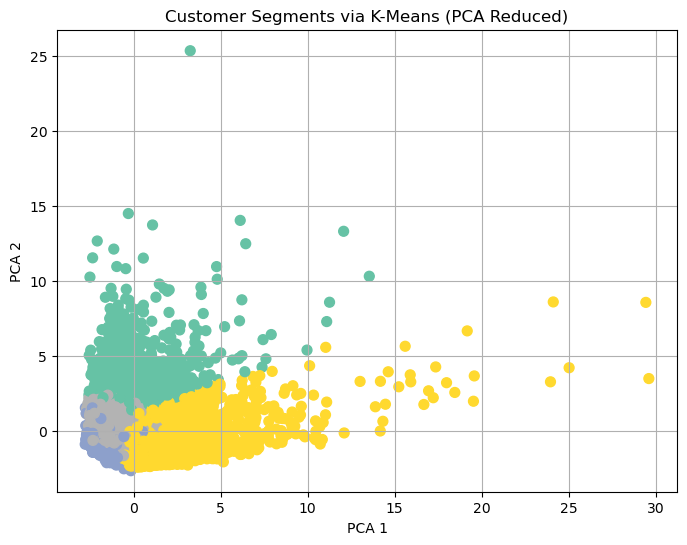

In [21]:
# 10. Visualize Clusters in 2D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='Set2', s=50)
plt.title('Customer Segments via K-Means (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [23]:
# 11. Save the Clustered Data 
df.to_csv('clustered_credit_data.csv', index=False)


In [24]:
df2 = pd.read_csv('clustered_credit_data.csv')


In [25]:
cluster_summary = df2.groupby('Cluster').mean(numeric_only=True)
cluster_summary


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,5010.394668,0.966663,716.017789,450.235875,265.885977,5065.974690,0.327150,0.160632,0.218675,0.508502,15.770727,10.345957,8208.653578,4173.817878,2214.536286,0.040025,11.416581
1,108.430006,0.412096,350.247868,190.521089,160.197189,299.482324,0.320591,0.072760,0.234912,0.035072,0.730330,4.812374,3632.112008,1036.853064,172.183554,0.253704,11.217888
2,1253.817942,0.974758,2182.022178,1241.768493,940.517248,234.564524,0.928413,0.390217,0.748106,0.041717,0.807569,32.727389,5121.987288,2148.583305,778.937414,0.282970,11.729314
3,1495.324927,0.966467,283.482824,210.004454,73.794186,782.285268,0.207097,0.098032,0.108717,0.157514,2.988420,3.665380,3216.349960,947.961448,805.685810,0.022886,11.482482


In [26]:
df['Cluster'].value_counts()



Cluster
3    3368
2    3118
1    1487
0     977
Name: count, dtype: int64

# conclusion

By applying K-Means clustering with k=4, we identified four distinct credit card customer segments:

Cluster 0: High-balance users who frequently use cash advances and rarely pay their full balance. These may be risky but profitable customers.

Cluster 1: Low-activity, low-risk users with minimal balances and low credit limits.

Cluster 2: High-value customers with significant one-off and installment purchases, high payment rates, and the best full payment record. Ideal for loyalty programs.

Cluster 3: Customers with low purchases and high cash advance usage, potentially indicating financial stress or reliance on credit for cash needs.activity, low-risk users with minimal balances and low credit limits.

Cluster 2: High-value customers with significant one-off and installment purchases, high payment rates, and the best full payment record. Ideal for loyalty programs.

Cluster 3: Customers with low purchases and high cash advance usage, potentially indicating financial stress or reliance on credit for cash needs.